# Rock music through the decades

## 1. Introduction

### 1.1 Motivation

We have always found ourselves deeply interested in music. We believe that music is one of the most beautiful forms of expression, whose history dates back to 40,000 years ago$^{[1]}$. Ever since its first appearance, music has changed and evolved, shaped by social and historical events. This has not been different in the last fifty years: music is in constant progress. New ways of expressing emotion through sound arise every single day. Human creativity never stops. This is why we find it very interesting to try to find the exact ways in which this art has developed since the decade of the seventies. How melodies, harmonies and rythms have transformed, how new instruments and techniques have created new genres. We find it thrilling to be able to discover how art adapts and grows. Another point, closely related to these, is what elements make a song likable. We want to understand what it is that certain songs have that make people feel good when they listen to them. Is there any clear way to know which songs are going to be popular based on their metrics, or is there something deeper, that can't be measured numerically?

[1] Killin, A. (2018). The origins of music: Evidence, theory, and prospects. Music & Science, 1. https://doi.org/10.1177/2059204317751971

### 1.2 Research questions

The research questions that we will try to answer in thi report are:

1. Is there a correlation between energy and tempo from our favorite rock albums from the 70's and 80's?


2. Furthermore, does this relationship change with albums for different decades?


3. Is there sufficient evidence to suggest that there is an association between decade and popularity in all rock songs on Spotify from the 1970´s and the 2020´s?


4. Is there sufficient evidence to suggest that there is an association between decade and whether a song makes it to the Billboard Hot 100 in all rock songs on Spotify from the 1970´s and the 2020´s?


5. Is there a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in the sample?


6. Is there sufficient evidence to suggest that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in all rock songs on Spotify made since 1970?


7. What explanatory variables should we include in the model that predicts if a song will be listed in the Billboard Hot 100 to build a parsimonious model?


8. Is there a linear relationship between the log-odds of a song being listed in the Billboard Hot 100 and popularity, explicit, tempo and danceability in all rock songs on Spotify made since 1970?


### 1.3 Datasets

In order to answer these questions, we will explore a dataset containing a sample of 1800 rock songs that are available on Spotify. We selected 300 songs from six different decades, starting in the seventies and all the way to the present day. We collected this information by using Spotify's API and the spotipy Python module. We made a random selection of songs from each decade by using a search query that included randomly selected characters and the time period we wanted. Once we had all 1800 songs in a dataframe, we used a function in the spotipy module to obtain the audio features of each one of them. Finally, we used another function that allows you to find the many smaller segments a song is made up of and the audio metrics within each one of them. 

We also have a second dataset which we will use for descriptive analytics. This dataset is not a random sample but a selection of some rock albums from the 1970's and 1980's that we find interesting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.proportion as prop
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler as standard_scaler
from sklearn.linear_model import LinearRegression

In [2]:
songs = pd.read_csv('songs.csv')

This is how the first dataset looks. It contains 41 variables. Some of these are variables that help identify what song is in that row: name, artist, album name, and their corresponding identification numbers. We also have some basic information about the track such as duration in milliseconds, release date and whether it is explicit or not. Then, we have the song's audio features: danceability, energy, key, loudness, speechiness and acousticness, among others. After that, we have features that we calculated ourselves: tone complexity represents how strongly different tones are present in all segments within a song. We averaged out the strenght of each one of the twelve tones in every segment of each song. If a song has segments with one very dominant tone and eleven barely noticeable tones, it will have a very low value for this variable. We also have the variance of the loudness in every segment within a song and the mean section lenght, where one section is a noteciably different part of the track, such as intro or chorus. We believe these metrics can help us capture how complex a song is. We also have variables representing the relative strenght of each of the twelve tones in the song. Finally, we have a variable that indicates the popularity rating that Spotify has assigned to that song, and another one where we can see if the song has ever been listed in a Billboard Hot 100 chart since it came out.



In [3]:
songs.head(3)

,track_id,track_name,duration,popularity,explicit,artist_id,artist_name,album_id,album_name,release_date,...,E,F,F_sharp,G,G_sharp,A,A_sharp,B,Decade,top_song
0,6meH4I9A4WZtD3z8hnQKqr,From The Morning,150850,58,0,5c3GLXai8YOMid29ZEuR9y,Nick Drake,5mwOo1zikswhmfHvtqVSXg,Pink Moon,25/02/1972,...,0.302758,0.594458,0.441691,0.739168,0.230356,0.235939,0.092282,0.221884,1970´s,0
1,5yrsBzgHkfu2idkl2ILQis,You Don't Mess Around with Jim,184640,61,0,1R6Hx1tJ2VOUyodEpC12xM,Jim Croce,3L9sVl5T7UpFK6tNeEiXdy,You Don't Mess Around With Jim,01/04/1972,...,0.691369,0.284395,0.314179,0.381449,0.381408,0.451971,0.307919,0.414050,1970´s,0
2,5dG0VEQ30r7GKylD5rsaEe,In Search Of England,256693,6,0,2pVMD4bFwl4AyoYyyo51Qg,Barclay James Harvest,6lNDlPa3ZNtqdLkirnpFxM,XII,1978,...,0.262113,0.332959,0.216197,0.347551,0.182995,0.292866,0.273011,0.265004,1970´s,0


In [4]:
albums = pd.read_csv('albums.csv')

Our second dataset has the same audio features as the first one, but it only includes eight albums that we selected from the seventies and eighties and that we believe are some of the most important works of those times. This is how this dataset looks.

In [129]:
albums.head(3)

,track_id,tempo,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,decade
0,574y1r7o2tRA009FW0LE7v,119.504,0.592,0.0195,1,-33.350,0.361,0.839,0.108,0.0313,1.0,0.0369,audio_features,4.0,70.S
1,2ctvdKmETyOzPb2GiJJT53,128.153,0.431,0.3730,11,-15.142,0.389,0.728,0.143,0.2530,0.0,0.0346,audio_features,4.0,70.S
2,73OIUNKRi2y24Cu9cOLrzM,165.393,0.389,0.5630,9,-21.191,0.650,0.903,0.104,0.1340,1.0,0.0622,audio_features,4.0,70.S


## 2. Descriptive Analytics

In this section, we want to answer the follinwg question:

1. Is there a correlation between energy and tempo from our favorite rock albums from the 70's and 80's?


2. Furthermore, does this relationship change with albums for different decades?

We chose these two as although it may seem like the faster the tempo the hyper the song , but that's not always the case. Louder doesn't neccesarily mean more hype, and even if that is the case so I thought it would be interesting to see if this had a correlation. Things to note: Scale is different for these metrics, so summary statistics like mean and standard deviation won't mean much. Energy is subjective to the spotify algorithm, not to our own opinion.

In [7]:
final = albums.copy()

Text(0.5, 0, 'Tempo')

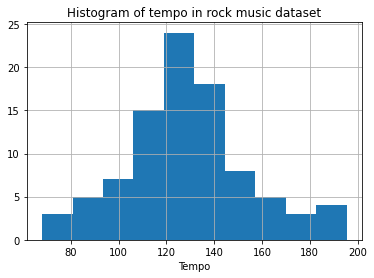

In [131]:
final['tempo'].hist()
plt.title('Histogram of tempo in rock music dataset')
plt.xlabel('Tempo')

It seems the tempo histogram is approximatley normal, with a center around 130.

Text(0.5, 0, 'Energy')

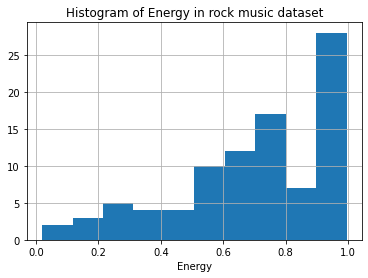

In [121]:
final['energy'].hist()
plt.title('Histogram of Energy in rock music dataset')
plt.xlabel('Energy')

The energy histogram is not normal, skewed very far left. This makes sense, as the energy metric is based on every song in spotify, and rock music is generally more high energy than most music.

<AxesSubplot:xlabel='tempo', ylabel='energy'>

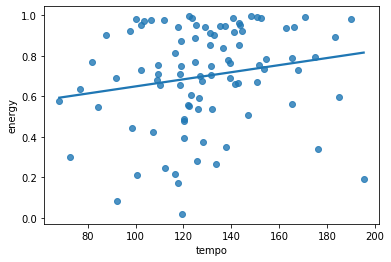

In [8]:
sns.regplot(x=final['tempo'], y=final['energy'],ci= None)

Unexpectedly, there doesn't seem to be much of a correlation between energy and tempo of the song. There is a very weak positive linear correlation between tempo and energy. The histograms indicated the energy maybe wasn't the best metric to use, and the scatterplot was very dissapointing so I did another comparison: Danceability vs energy Notes about Danceability: It is basically a spotify generated statistic that uses duration, tempo and other inputs to determine the number. With it being normalized to decimal, we can better compare the two metrics to answer a similar question. New question: Do dancibility and energy have any correlation in me and Omar's favorite Rock albums from the 70's and 80's?

Text(0.5, 0, 'Danceability')

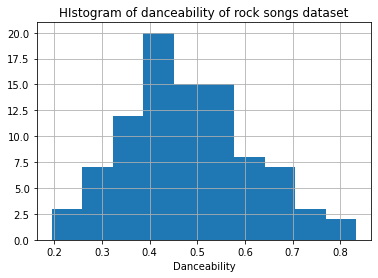

In [123]:
final['danceability'].hist()
plt.title('HIstogram of danceability of rock songs dataset')
plt.xlabel('Danceability')

In [124]:
final['energy'].std()

0.2480377487795696

In [125]:
final['danceability'].std()

0.1345729225228825

Danceability is less varied than energy, with a much more normal histogram that is slighty skewed right. This is unexpected, as danceability is calcualted based on every spotify song, so I thought it would be like energy being clustered more on the higher side. When thinking about it, however, it makes sense, as the most 'dancable' songs in my mind are edm/house songs and pop music.

Text(0, 0.5, 'Energy')

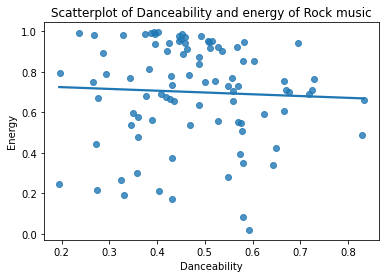

In [126]:
sns.regplot(x= 'danceability', y='energy', data= final, ci=None)
plt.title('Scatterplot of Danceability and energy of Rock music')
plt.xlabel('Danceability')
plt.ylabel('Energy')

There is a very weak negative correlation between Danceability and energy. Suprisingly, there is basically no correlation between these two variables. One explanation I have for this is that the rock songs that are considered high energy are more like guitar solo head bopping songs, rather than strong bassline high tempo songs the danceability stat favors.

I also want to explore if there is a stronger correlation between danceability and energy in the 70s and 80's. Notes- I tried to pick albums that I liked, but also displayed a difference in style between the decades so there might be some validity to the test.

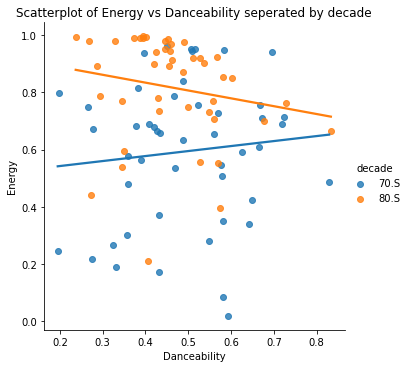

In [134]:
sns.lmplot(x='danceability', y='energy', data= final, hue='decade', ci=False)
plt.title('Scatterplot of Energy vs Danceability seperated by decade')
plt.xlabel('Danceability')
plt.ylabel('Energy') 
plt.show()

Although there aren't very strong correlations, there is still some trends to notice. The best fit line for the 70's line energy has a very low correlation, with dots scattered all over the plot. The line has a very weak positive correlation, but the line is as expected positive, as the song become more danceable the energy gets higher. The eighties has a surprising result, however. The line of best fit is negative with a slightly stronger correlation than the 70's line. There is a lot of high energy, low danceability songs from the 80's contributing to the result. This could be due to the albums I picked, I picked Journey and Rush who have a lot of slower but methodic mainly guitar songs.

## 3. Inference

For this part of the report, we want to explore the relationship between what decade a song was released in and how popular the song is. We will choose only the songs that come from the decade of the 1970´s or the 2020´s. We will use a significance level of $\alpha = 0.05$. The questions that we will answer in this section are:

1. Is there sufficient evidence to suggest that there is an association between decade and popularity in all rock songs on Spotify from the 1970´s and the 2020´s?


2. Is there sufficient evidence to suggest that there is an association between decade and whether a song makes it to the Billboard Hot 100 in all rock songs on Spotify from the 1970´s and the 2020´s?

In [3]:
seventies = songs[songs.Decade == '1970´s']
twenties = songs[songs.Decade == '2020´s']

In [5]:
sample = pd.concat([seventies, twenties])

In [6]:
sample.head(2)

,track_id,track_name,duration,popularity,explicit,artist_id,artist_name,album_id,album_name,release_date,...,E,F,F_sharp,G,G_sharp,A,A_sharp,B,Decade,top_song
0,6meH4I9A4WZtD3z8hnQKqr,From The Morning,150850,58,0,5c3GLXai8YOMid29ZEuR9y,Nick Drake,5mwOo1zikswhmfHvtqVSXg,Pink Moon,25/02/1972,...,0.302758,0.594458,0.441691,0.739168,0.230356,0.235939,0.092282,0.221884,1970´s,0
1,5yrsBzgHkfu2idkl2ILQis,You Don't Mess Around with Jim,184640,61,0,1R6Hx1tJ2VOUyodEpC12xM,Jim Croce,3L9sVl5T7UpFK6tNeEiXdy,You Don't Mess Around With Jim,01/04/1972,...,0.691369,0.284395,0.314179,0.381449,0.381408,0.451971,0.307919,0.414050,1970´s,0


### 3.1 Association between decade and popularity

Spotify's popularity metric is composed of three main factors: 1. Total streams of a song, 2.How recently a song has been played and 3. The frequency that a track has been played. This means that this number not only considers how many times people have listened to a track, but also when these listens have taken place and whether they were all in a short timeframe or have evenly been spread accross time. 

This way, if two songs have the same number of listens, but one has been listened recently while the other one was listened ten years ago, the recent song will have a greater rating. Then, using this variable we learn if old songs have remained popular in the present or if they have lost popularity to new songs. The question we will answer is: 

Is there sufficient evidence to suggest that there is an association between decade and popularity in all the rock songs on Spotify from the 1970´s and the 2020´s?


We will use a t-test since we do not know the population variances for this variable. We will not assume equality of variances. First, we will establish our hypotheses:

$H_o: \mu_{1970}-\mu_{2020} = 0$ 

$H_a: \mu_{1970}-\mu_{2020} \neq 0$

Now, we will ask ourselves if our sample complies with the conditions for inference. Our samples have the following characteristics:

1. Sample 1970 is random
2. Sample 2020 is random 
3. $n_{1970} < 10\%$ of its population size 
4. $n_{2020} < 10\%$ of its population size 
5. $n_{1970} > 30$
6. $n_{2020} > 30$
7. Observations in sample 1970 and sample 2020 are independent.

Then, we can say that our samples meet all the conditions necessary for inference. Now, we extract the data of the decades that we are interested in.

In [13]:
popularity_2020 = twenties.popularity
popularity_1970 = seventies.popularity

In [10]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 150

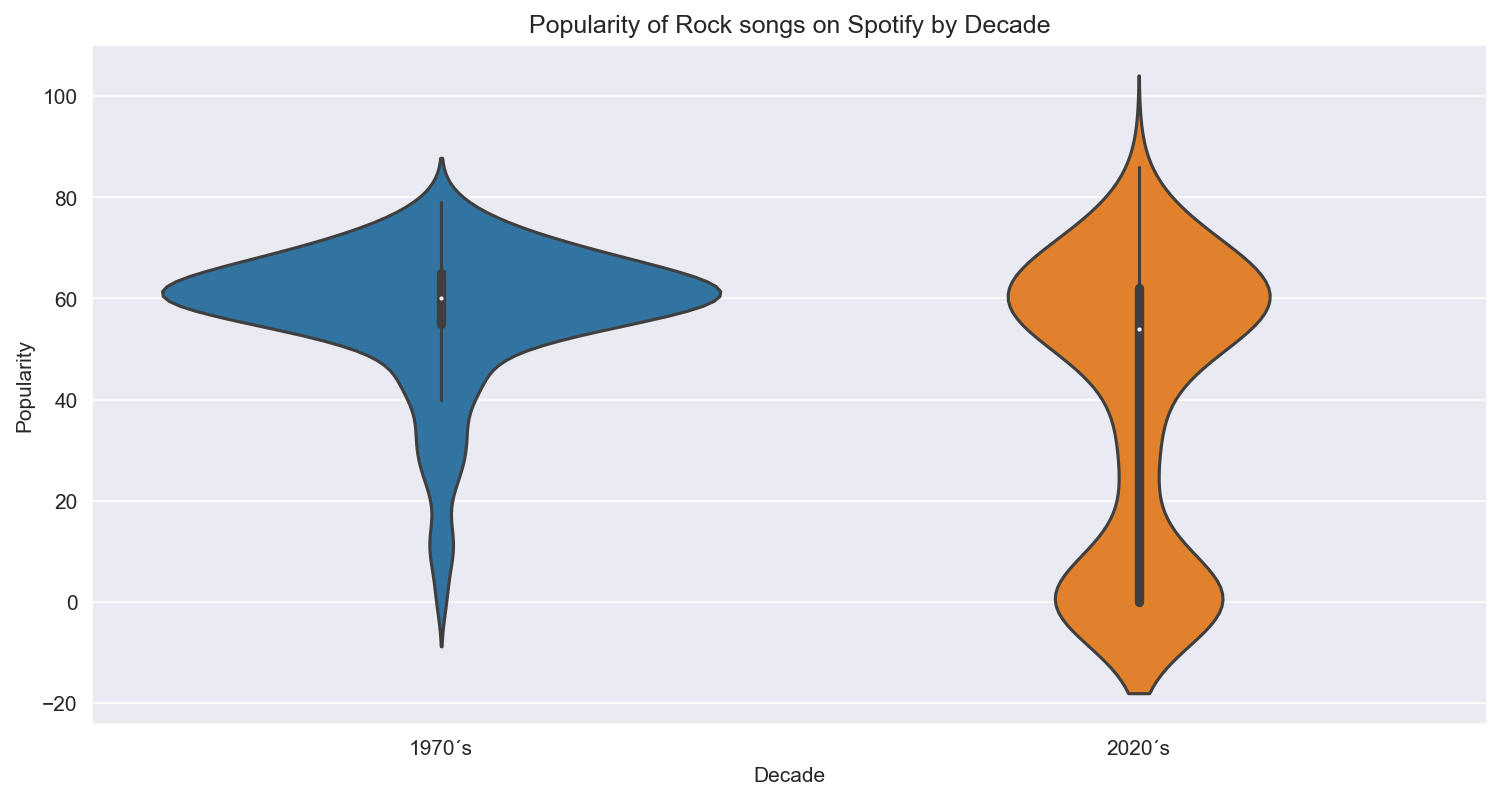

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.violinplot(x='Decade', y='popularity', data=sample)
ax.set_ylabel('Popularity')
ax.set_title('Popularity of Rock songs on Spotify by Decade')
plt.savefig(r'C:\Users\omarp\Documents\Proyectos\Portafolios\images2\pop_por_decada.png')
plt.show()

In [37]:
seventies.popularity.describe()

count    300.000000
mean      57.246667
std       13.730535
min        0.000000
25%       55.000000
50%       60.000000
75%       65.000000
max       79.000000
Name: popularity, dtype: float64

The sample means are the following:

In [6]:
print('1970´s:',round(popularity_1970.mean(),2),'- 2020´s:',popularity_2020.mean())

1970´s: 57.25 - 2020´s: 39.72


Now, we conduct the t-test and find the results.

In [7]:
results = stats.ttest_ind(popularity_1970, popularity_2020, equal_var=False)
results

Ttest_indResult(statistic=9.667593561076869, pvalue=3.787540716716632e-20)

In [27]:
def proportion(series):
    return 100*sum(series)/len(series)

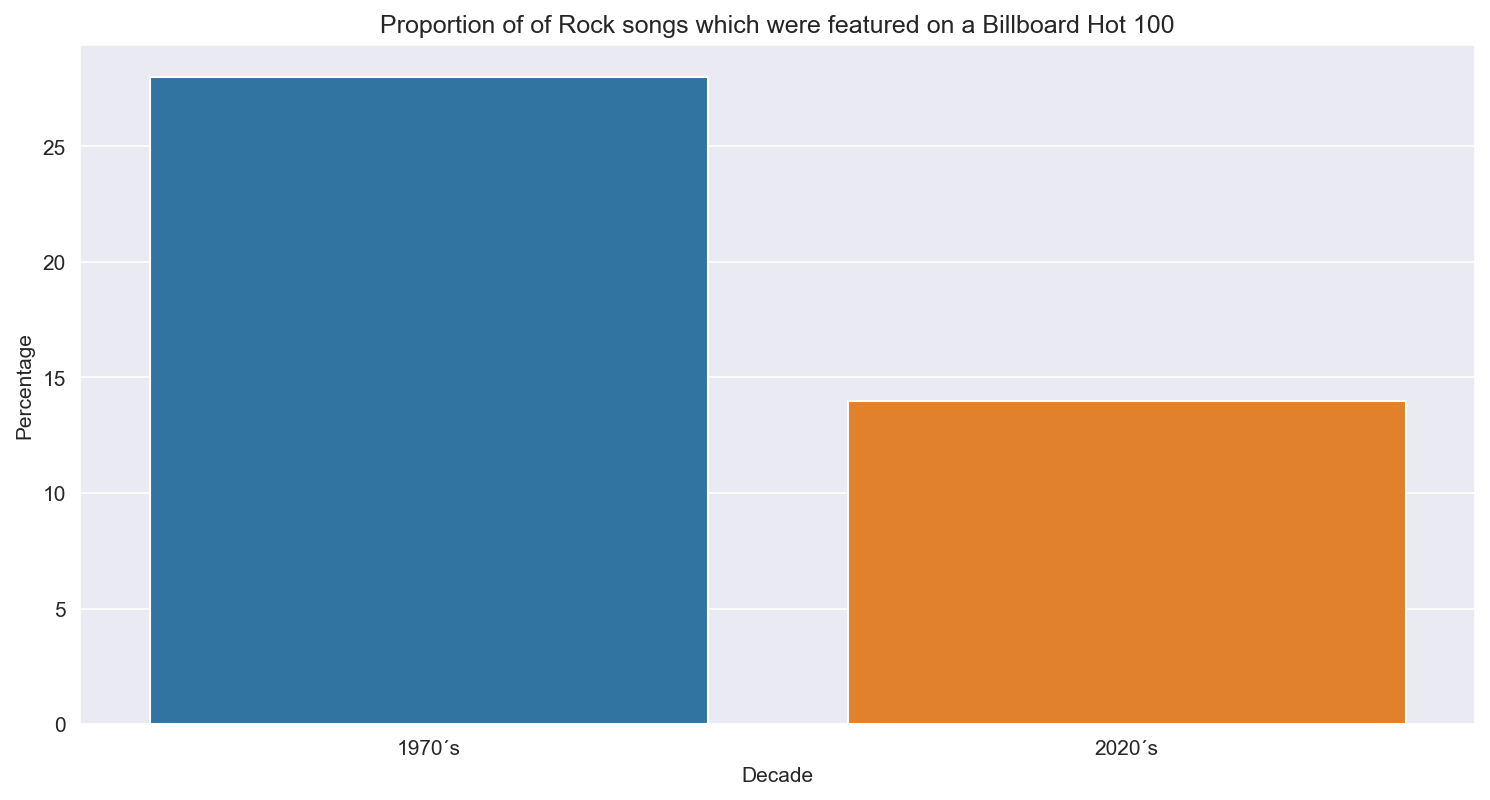

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=sample, x='Decade', y='top_song', ax=ax, estimator=proportion, ci=None)
ax.set_ylabel('Percentage')
ax.set_title('Proportion of of Rock songs which were featured on a Billboard Hot 100')
plt.savefig(r'C:\Users\omarp\Documents\Proyectos\Portafolios\images2\proporcion_por_decada.png')
plt.show()

In [24]:
mean_70 = seventies.popularity.mean()
mean_20 = twenties.popularity.mean()
std_70 = seventies.popularity.std()
std_20 = twenties.popularity.std()

In [58]:
mean_diff = mean_70 - mean_20
stderror = np.sqrt((std_20**2/300)+(std_70**2/300))
t_dof_num = ((std_70**2/300) + (std_20**2/300))**2
t_dof_den = (((std_70**2/300)**2)/299) + (((std_20**2/300)**2)/299)
t_dof = t_dof_num/t_dof_den

In [59]:
t_dist = stats.t(df = t_dof)

In [63]:
lower_bound = mean_diff + t_dist.ppf(0.025)*stderror
upper_bound = mean_diff + t_dist.ppf(0.975)*stderror

In [64]:
lower_bound, upper_bound

(13.963427467189678, 21.08990586614366)

With a p-value of around $(3.7)x10^{-20}$ we can conclude that there is sufficient evidence to suggest that the mean popularity of rock songs from the seventies is not equal to the mean popularity of rock songs from the tewnty-twenties. Then, we can say that there is sufficient evidence to suggest that there is an association between decade and popularity in all the rock songs on Spotify from the 1970´s and the 2020´s

### 3.2 Association between decade and proportion of songs in Billboard Hot 100

Another way to measure how popular a song is, is finding if it ever made it to a Billboard Hot 100 chart. This can help us find if there was any point in time when the song was considered one of the hundred most popular songs at the moment.

This can also generate some discussion about how rock's popularity has changed through the years relative to other genres. The question we want to answer is:

Is there sufficient evidence to suggest that there is an association between decade and whether a song makes it to the Billboard Hot 100 in all rock songs on Spotify from the 1970´s and the 2020´s?

We will establish our hypotheses:

$H_o: p_{1970}-p_{2020} = 0$ 

$H_a: p_{1970}-p_{2020} \neq 0$

Also, since this test is conducted with the same samples as the one above, but with a different variable, we already know that the first four and conditions for inference are met, as well as the seventh one. But now, we have to find the sample proportions in order to finish assessing if we can conduct inference.

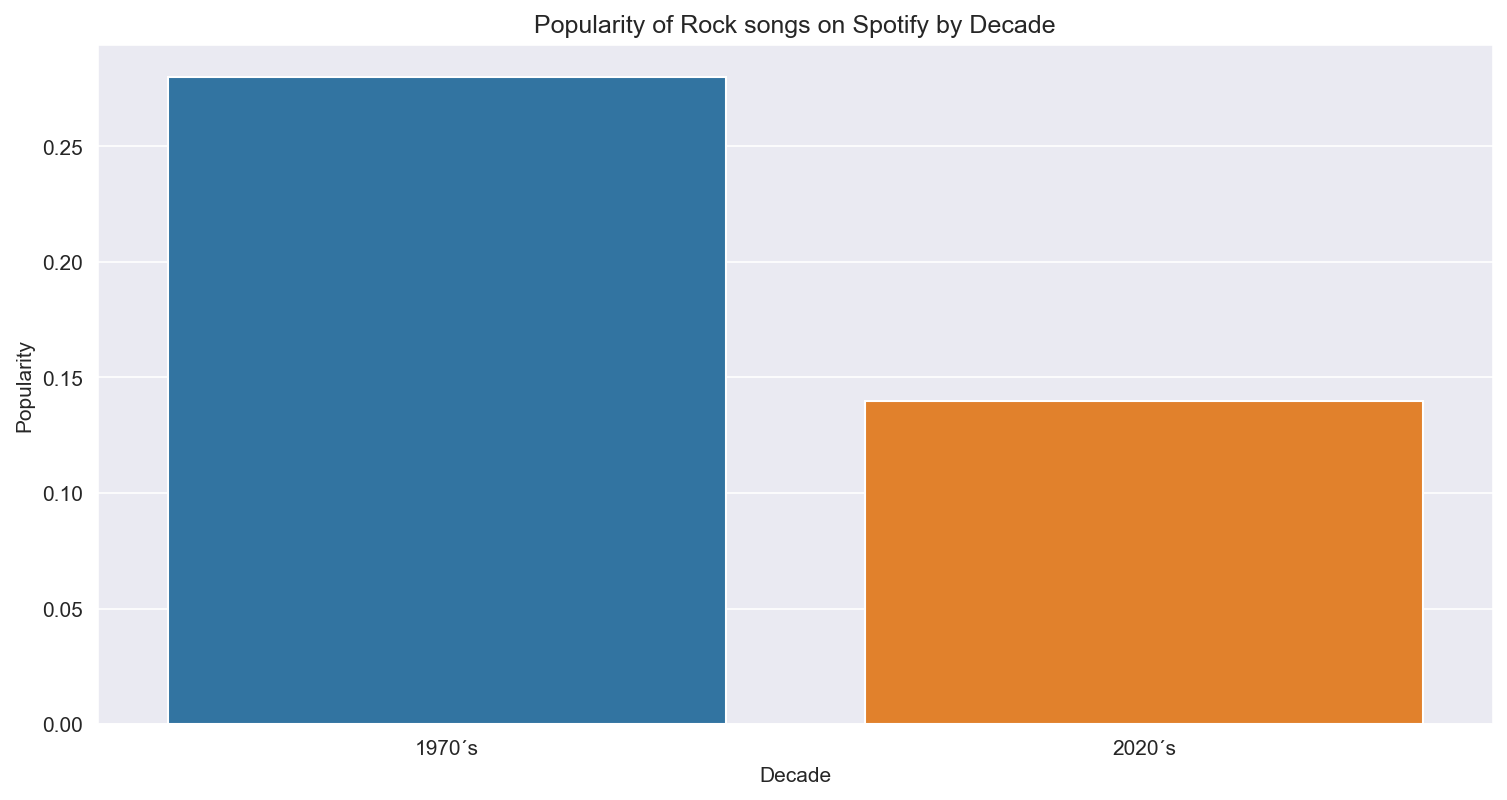

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Decade', y='top_song', data=sample, ci=None)
ax.set_ylabel('Popularity')
ax.set_title('Popularity of Rock songs on Spotify by Decade')
plt.show()

In [18]:
sample.groupby('Decade').top_song.sum()

Decade
1970´s    84
2020´s    42
Name: top_song, dtype: int64

In [35]:
p_2020 = twenties.top_song.mean()
p_1970 = seventies.top_song.mean()

In [9]:
print('1970´s:',p_1970,'-','2020´s:', p_2020)

1970´s: 0.28 - 2020´s: 0.14


Now, we can confirm that: 

5. $(n_{1970})(\hat{p}_{1970}) \geq 10$ and $(n_{1970})(1-\hat{p}_{1970}) \geq 10$
6. $(n_{2020})(\hat{p}_{2020}) \geq 10$ and $(n_{2020})(1-\hat{p}_{2020}) \geq 10$

Then, we proceed to the test. First, we will create the point estimate.

In [36]:
point_estimate = p_1970-p_2020

Now, we can obtain the santard error of the new variable an calculate the test statistic.

In [37]:
standard_error = math.sqrt((p_2020*(1-p_2020)/300)+(p_1970*(1-p_1970)/300))
normal = stats.norm()
z = point_estimate/standard_error
print('Test statistic:', z)

Test statistic: 4.2732738696715185


Finally, we will find the corresponding p-value in order to reach a conclusion regarding our hypotheses. 

In [38]:
p_value = 2*(1-normal.cdf(z))
print('P-value:', p_value)

P-value: 1.9262362474403716e-05


In [42]:
point_estimate-1.96*standard_error, point_estimate+1.96*standard_error

(0.07578693798506934, 0.20421306201493067)

With a p-value of around $(1.9)x10^{-5}$ we can conclude that there is sufficient evidence to suggest that the proportion of rock songs from the seventies that make it to the Billboard Hot 100 is not equal to the proportion of rock songs from the tewnty-twenties that make it to the ranking. Then, we can say that there is sufficient evidence to suggest that there is an association between decade and whether a song is listed in the Billboard Hot 100 for all rock songs on Spotify from the 1970´s and the 2020´s

## 4. Linear Regression

In this section of the report we will deal with the popularity metric of songs. We will not only use a sample from the seventies and the twenty-twenties as we did in the previous part. We will use our entire dataset. What we would like to discover is what makes a rock song popular. Is it possible to find specific characteristics that make people like a track? In order to explore these ideas, we will use linear regression to answer the following questions: 

1. Is there a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in the sample?


2. Is there sufficient evidence to suggest that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in all rock songs on Spotify made since 1970?

We chose to study popularity as our response variable because we think it would be very interesting to be able to find if there are specific audio features that make a song popular. Regarding our explanatory variables, we chose speechiness because we believe that songs that people can sing to can be more appealing to the general public; we chose danceability because we thought that maybe people tend to feel more connected to songs they feel like they can dance to; explicit because, as rock has been famously associated with protest, energy and youth, we think that maybe explicit rock songs can be more popular. Finally, we chose energy because, we believe that maybe a more energetic song can be appealing to people. 


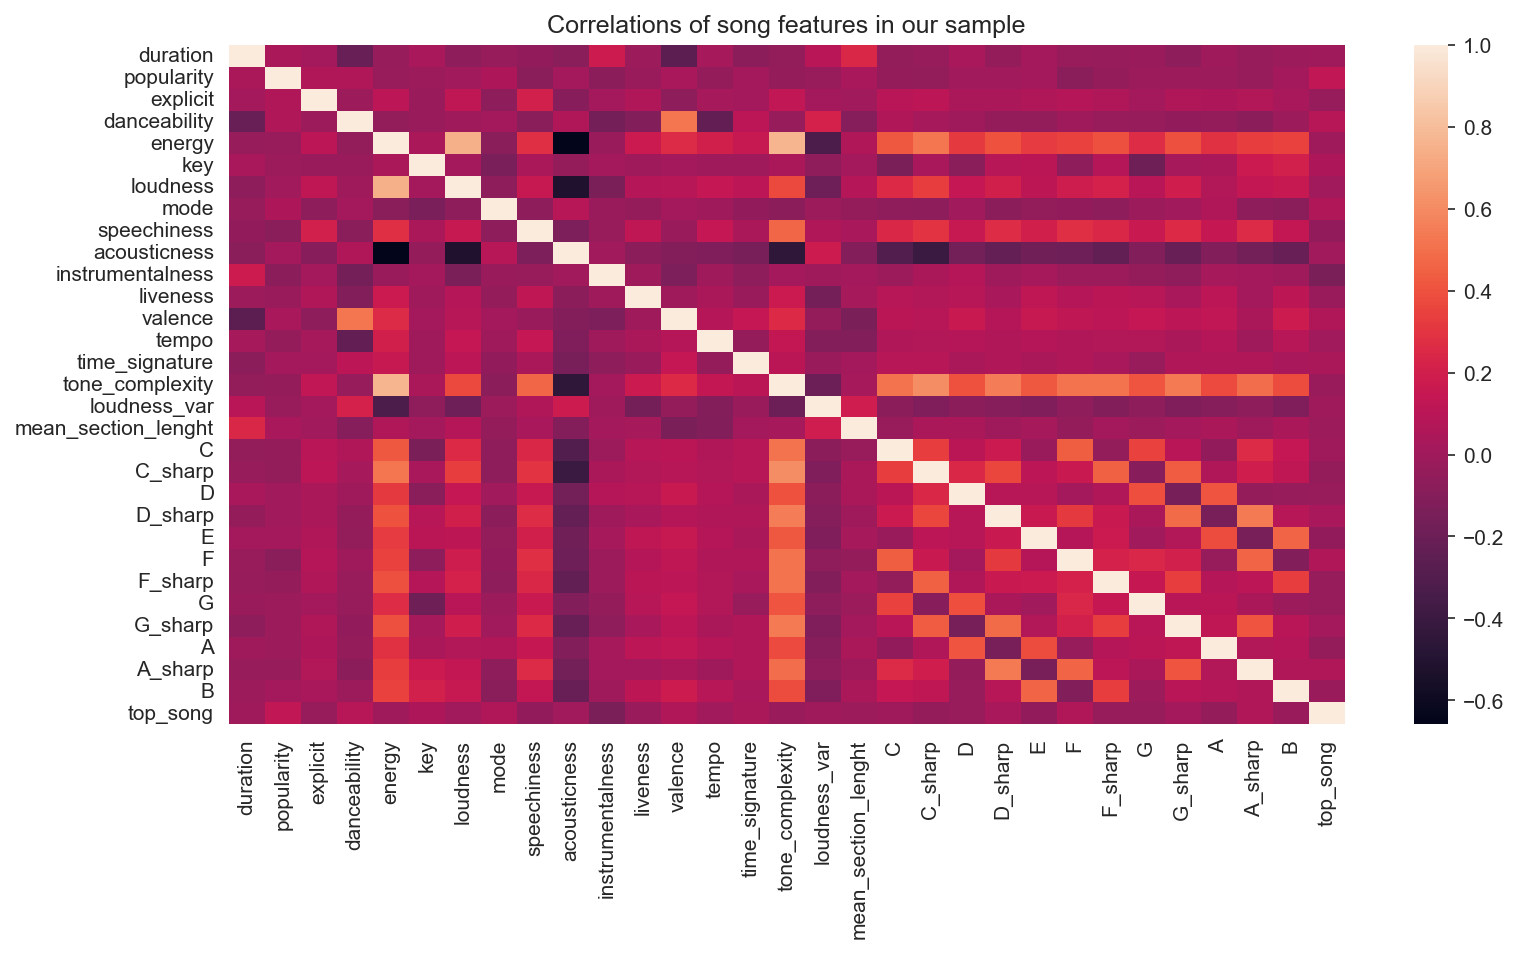

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(songs.corr())
ax.set_title('Correlations of song features in our sample')
plt.savefig(r'C:\Users\omarp\Documents\Proyectos\Portafolios\images2\heatmap.png')
plt.show()


In [20]:
songs.columns

Index(['track_id', 'track_name', 'duration', 'popularity', 'explicit',
       'artist_id', 'artist_name', 'album_id', 'album_name', 'release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'time_signature', 'tone_complexity', 'loudness_var',
       'mean_section_lenght', 'C', 'C_sharp', 'D', 'D_sharp', 'E', 'F',
       'F_sharp', 'G', 'G_sharp', 'A', 'A_sharp', 'B', 'Decade', 'top_song'],
      dtype='object')

In [3]:
X = songs[['duration','explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'time_signature', 'tone_complexity', 'loudness_var',
       'mean_section_lenght', 'C', 'C_sharp', 'D', 'D_sharp', 'E', 'F',
       'F_sharp', 'G', 'G_sharp', 'A', 'A_sharp', 'B', 'Decade']]

y = songs.popularity


In [5]:
X = pd.get_dummies(X, drop_first=True)
features = X.columns

In [6]:
scaler = standard_scaler()
X = scaler.fit_transform(X)

In [7]:
model = LinearRegression()

In [8]:
sfs = SFS(estimator=model, k_features=5, forward=True, scoring='r2')
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [9]:
selected = [int(x) for x in sfs.subsets_[5]['feature_names']]

In [10]:
features[selected]

Index(['speechiness', 'Decade_1990´s', 'Decade_2000´s', 'Decade_2010´s',
       'Decade_2020´s'],
      dtype='object')

In [19]:
regression = sfs.estimator

In [29]:
a = songs.copy()[['duration','explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'time_signature', 'tone_complexity', 'loudness_var',
       'mean_section_lenght', 'C', 'C_sharp', 'D', 'D_sharp', 'E', 'F',
       'F_sharp', 'G', 'G_sharp', 'A', 'A_sharp', 'B', 'Decade','popularity']]

In [33]:
a = pd.get_dummies(a,drop_first=True)

In [37]:
a.rename(columns={'Decade_1990´s':'Decade_1990s','Decade_2000´s':'Decade_2000s','Decade_2010´s':'Decade_2010s',
                  'Decade_2020´s':'Decade_2020s'}, inplace=True)

Now, we will fit our model.

In [40]:
model = smf.ols('popularity~speechiness+Decade_1990s+Decade_2000s+Decade_2010s', a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     29.79
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           5.01e-24
Time:                        12:10:40   Log-Likelihood:                -7639.1
No. Observations:                1800   AIC:                         1.529e+04
Df Residuals:                    1795   BIC:                         1.532e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.7110      0.760     70.653      0.000      52.220      55.202
speechiness    -41.4669      9.761     -4.248      0.000     -60.610     -22.324
Decade_1990s     6.4804      1.126      5.757      0.000       4.273       8.688
Decade_2000s     7.6455      1.126      6.788      0.000       5.436       9.855
Decade_2010s     9.6616      1.127      8.575      0.000       7.452      11.871
==============================================================================
Omnibus:                      500.473   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.397
Skew:                          -1.553   Prob(JB):                    3.14e-249
Kurtosis:                       5.370   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With these results, our linear regression can be expressed as:

$\hat{popularity} = 53.71 - 41.46 speechiness + 6.4804 Decade 1990's + 7.65 Decade 2000's + 9.67 Decade 2010's $

Where $\hat{y}$ is the predicted popularity of a song.

Now, we will check for conditions for this to be a valir linear regression. In order to do so, we will first show a plot of the model's residuals vs fitted values and a residuals histogram.

In [42]:
y_hat = model.fittedvalues
residuals = model.resid

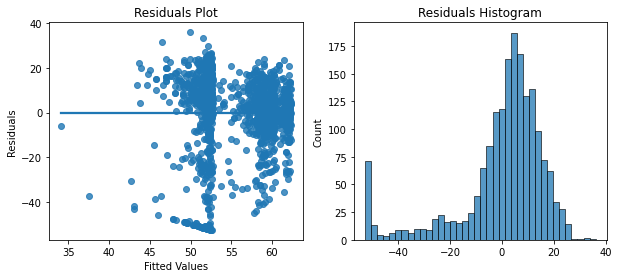

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_title('Residuals Plot')
sns.regplot(x=y_hat, y=residuals, ci=None, ax = ax1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax2.set_title('Residuals Histogram')
ax2 = sns.histplot(residuals)

plt.savefig(r'C:\Users\omarp\Documents\Proyectos\Portafolios\images2\residuals.png')
plt.show()

1. Linearity condition. There seems to be very a larger number of positive residuals as we reach 55 along the x axis, so we can say that this condition is not met.


2. Constant variability of residuals. The range of the residuals changes as we move along the x axis, so we can say that this condition is not met.


3. Normality of residuals. The residuals of the model are not centered at zero and do not follow a normal curve. This condition is not met.


4. Independence of residuals. Since the sample was taken randomly and n < 10% of all rock songs on Spotify made since 1970, this condition is not violated, at least not in those ways.


5. From the pairplot displayed above, we can say that there is not a clear collinear relationship between any two explanatory variables, so we claim that this condition is met.

Since not all conditions are met, we will try to fix this by transforming one of the variables and fitting a new model.We will create a new column: log popularity. Since there are songs with 0 popularity, we will add 1 to each value before applying the logarithm.

In [16]:
songs['log_popularity'] = np.log(songs.popularity+1)
model2 = smf.ols('log_popularity~speechiness+explicit+danceability+energy', songs).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_popularity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.706
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.35e-05
Time:                        16:40:07   Log-Likelihood:                -2358.1
No. Observations:                1800   AIC:                             4726.
Df Residuals:                    1795   BIC:                             4754.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0113      0.117     34.328      0.000       3.782       4.240
speechiness     -1.8528      0.550     -3.367      0.001      -2.932      -0.774
explicit         0.3357      0.092      3.632      0.000       0.154       0.517
danceability     0.0873      0.155      0.563      0.573      -0.217       0.392
energy          -0.1794      0.109     -1.652      0.099      -0.392       0.034
==============================================================================
Omnibus:                     1320.352   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14513.879
Skew:                          -3.554   Prob(JB):                         0.00
Kurtosis:                      14.958   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With these results, our linear regression can be expressed as:

$log(\hat{y}) = 4.0113 - 1.8528 speechiness + 0.3357 explicit + 0.0873 danceability - 0.1794 energy$

Where $\hat{y}$ is the predicted popularity of a song.

Now, we will check the conditions for linear regression again to see if this transformation helped meet them.

In [18]:
y_hat2 = model2.fittedvalues
residuals2 = model2.resid

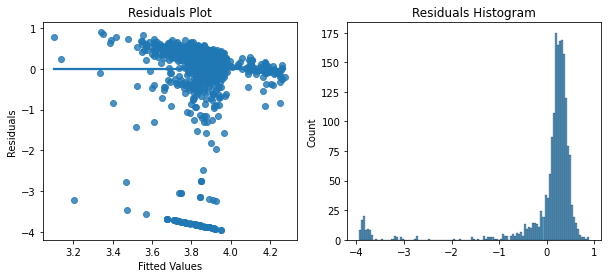

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_title('Residuals Plot')
sns.regplot(x=y_hat2, y=residuals2, ci=None, ax = ax1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax2.set_title('Residuals Histogram')
ax2 = sns.histplot(residuals2)


plt.show()

Given that this transformation did not really improve the conditions, our final model will be the first one, without the transformation. We consider that this model is a poor fit for two reasons:

1. $R^2$ is 0.017, which is close to zero. This tells us that our model only explains 1.7% of the variability of the data.


2. Since the linearity condition is not met, we cannot say that this model actually fits the data.

Now, we will discuss whether we can say that the slopes in our model work for the entire population. First, we should recall that the conditions for linear regression were not met.

In the summary output table, we can see that the p-values for our slopes are the following:

speechiness: 0.000,
explicit: 0.000,
danceability: 0.046,
energy: 0.813

If our linear regression conditions were met, we would be able to say that there is sufficient evidence to suggest that the slopes for speechiness, explicit and danceability in the corresponding population model are non-zero. This is due to the fact that those slopes have a p-value lower than our significance level for this study which is 0.05

Finally, we will answer our research questions for this section:


1. Given that the linearity condition is not met and the model's $R^2$ is 0.017, we cannot claim that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in the sample. 


2. Linear regression conditions were not met, so there is not sufficient evidence to suggest that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in all rock songs on Spotify made since 1970

## 5. Logistic Regression

In this section, we will study what factors in our dataset have a relationship with the probability that a given song is listed in the Billboard Hot 100 at some point. We chose this as a response variable because we believe that a song being listed is a good measure of its success. This time, we will analyze more explanatory variables: popularity, explicit, duration, danceability, energy, loudness, speechiness, acousticness, liveness, tempo and mean section lenght. We chose these because we think that they are a good representation of the song itself. From these variables we can get a rough idea about whether a song is more of an acoustic slow folkish track or an instrumental powerful rock tune, for example. The general question that we will specifically try to answer is: 

1. What explanatory variables should we include in the model that predicts if a song will be listed in the Billboard Hot 100 to build a parsimonious model?


2. Is there a linear relationship between the log-odds of a song being listed in the Billboard Hot 100 and popularity, explicit, tempo and danceability in all rock songs on Spotify made since 1970?

In order to answer these questions, we will first split our dataset into training and test datasets. 

In [3]:
songs_X = songs[['duration','explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'time_signature', 'tone_complexity', 'loudness_var',
       'mean_section_lenght', 'C', 'C_sharp', 'D', 'D_sharp', 'E', 'F',
       'F_sharp', 'G', 'G_sharp', 'A', 'A_sharp', 'B', 'Decade']]

songs_y = songs['top_song']

In [4]:
songs_X = pd.get_dummies(songs_X, drop_first=True)

In [6]:
x_columns = songs_X.columns

In [7]:
x_train, x_test, y_train, y_test = train_test_split(songs_X, songs_y, test_size=0.1, random_state = 10)

In [8]:
scaler = standard_scaler()

In [9]:
x_train = scaler.fit_transform(x_train)

In [14]:
x_test = scaler.transform(x_test)

### 5.1 Backwards selection of variables

Now, we will perform a backwards selection algorithm on our training dataset to find which of our initial 11 explanatory variables yield a relatively parimonious logistic regression model. We will use the AIC metric to do so.

In [11]:
log_reg = linear_model.LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [12]:
log_reg.coef_

array([[ 0.08057529, -0.06434713,  0.19164448,  0.03601376,  0.1346787 ,
         0.        ,  0.13724013, -0.08321639, -0.03021774, -0.51722687,
         0.00749169,  0.        ,  0.10883371,  0.04138562,  0.        ,
        -0.01944226, -0.02165977, -0.0067478 , -0.13059696,  0.1011123 ,
         0.01442828, -0.15011617,  0.19373872, -0.08153214, -0.13471121,
         0.10381442, -0.01234805,  0.03740997,  0.04913885, -0.0359002 ,
         0.07999203,  0.05618185,  0.02792715, -0.31070221]])

In [16]:
log_reg.score(x_test, y_test)

0.75

We have found that the most parsimonious model that we could find is one that uses the following variables:
Popularity, explicit, danceability and tempo, which yield an AIC of 1831.11

### 5.2 Final model fitting

In [31]:
logit_model = smf.logit('top_song~popularity+explicit+danceability+tempo', data=train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.563750
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               top_song   No. Observations:                 1620
Model:                          Logit   Df Residuals:                     1615
Method:                           MLE   Df Model:                            4
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                 0.02364
Time:                        16:40:08   Log-Likelihood:                -913.28
converged:                       True   LL-Null:                       -935.39
Covariance Type:            nonrobust   LLR p-value:                 5.743e-09
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.2979      0.462     -7.133      0.000      -4.204      -2.392
popularity       0.0199      0.004      5.066      0.000       0.012       0.028
explicit        -0.4948      0.271     -1.824      0.068      -1.026       0.037
danceability     1.3719      0.438      3.131      0.002       0.513       2.231
tempo            0.0034      0.002      1.608      0.108      -0.001       0.007
================================================================================
"""

Then, the logistic equation regresison can be written as:

$log(\frac{\hat{p}}{1-\hat{p}}) = -3.4506 + 0.0191 popularity - 0.5004 explicit + 1.7301 danceability + 0.0033 tempo$

where $\hat{p}$ is the predicted probability that a song will be listed in the Billboard hot 100

We will noe use this model to make popularity predictions for the songs in our test dataset.

In [56]:
predicted = logit_model.predict(test)
y_real = test.top_song

In [66]:
fpr, tpr, thresholds = roc_curve(y_true = y_real, y_score=predicted)
area = auc(fpr,tpr)

Then, we can plot our ROC curve and display its area under the curve.

Text(0.5, 0, 'False positive rate')

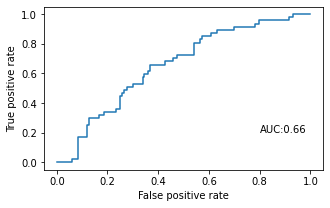

In [74]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(fpr, tpr)
ax.annotate('AUC:'+str(round(area,2)), (0.8,0.2))
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')

The AUC of 0.66 tells us that this classifier's ability to tell apart songs that make it to the Billboard Hot 100 is not too high, but it is better than the ability a random classifier would have.

This classifier's purpose is to be able to tell someone who uploads rock music on Spotify if their song will ever be in the Billboard Hot 100. We believe that it is better to establish a conservative treshold so as not it give people the wrong expectation that their song will succeed. We want to keep the false positive rate low, so we will set a desired false positive rate of around 0.40. 

In [88]:
threshold_index = list(fpr).index(max(fpr[fpr<0.4]))
threshold = thresholds[threshold_index]
threshold

0.2914808295878714

In [109]:
thresholds

array([1.40632981, 0.40632981, 0.39117792, 0.39070234, 0.37564159,
       0.37301089, 0.36214621, 0.35383816, 0.35353064, 0.3500201 ,
       0.34427476, 0.34066617, 0.33844941, 0.33766733, 0.33231757,
       0.33226104, 0.3320659 , 0.32808205, 0.32619931, 0.32340534,
       0.32329929, 0.32026883, 0.31485189, 0.31430515, 0.31316565,
       0.31315224, 0.31238902, 0.31222612, 0.31099001, 0.30889164,
       0.3068726 , 0.29782063, 0.2954389 , 0.29493352, 0.29375796,
       0.29371601, 0.29192008, 0.29148083, 0.2907066 , 0.28556492,
       0.2851072 , 0.28314739, 0.28301636, 0.27901681, 0.2780497 ,
       0.26806461, 0.26019478, 0.25880257, 0.25832709, 0.25802105,
       0.2576016 , 0.25158282, 0.2512954 , 0.24925877, 0.2488409 ,
       0.23988644, 0.23939767, 0.23720435, 0.22483185, 0.22388151,
       0.21708124, 0.2165262 , 0.17330447, 0.16977646, 0.16049061,
       0.15564017, 0.08115042])

Our selected probability threshold is 0.2915. With this, we can classify our test dataset and see how our model performs.

In [101]:
classified_test = predicted.apply(lambda x: 1 if x>threshold else 0)

In [102]:
confusion = confusion_matrix(y_real, classified_test)
confusion

array([[85, 48],
       [18, 29]], dtype=int64)

In [103]:
false_positive = confusion[0][1]/(confusion[0][1]+confusion[1][1])
true_positive = confusion[0][0]/(confusion[0][0]+confusion[1][0])
print('True positve rate:', true_positive, 'False positive rate:', false_positive)

True positve rate: 0.8252427184466019 False positive rate: 0.6233766233766234


It is possible to conduct inference on the obtained model slopes. From the results obtained above, we can conclude that there is sufficient evidence to suggest that the following slopes in the corresponding population model are non-zero: 

1. popularity
2. danceability

This cannot be said about explicit or tempo, whose p-values are greater than our level of significance. Then, we can conclude that the variables that should be included in a parsimonious model that predicts if a song will be listed in a Billboard Hot 100 chart are popularity, explicit, tempo and danceability. However, there is not enough evidence to suggest a linear relationship between the log odds of a song being listed in the Billboard Hot 100  and popularity, explicit, tempo and danceability in all rock songs on Spotify made since 1970.

## 6. Conclusion

In this report we have explored the relationship between several variables in our datasets. We found that there is a very weak negative correlation between danceability and energy in the albums we selected from the seventies and eighties. Suprisingly, we found basically no correlation between these two variables. Furthermore, when separating these albums by decade, we found that although there aren't very strong correlations, there is still some trends to notice. The relationship between danceability and energy changes by decade in our dataset.The best fit line for the 70's line energy has a very low correlation. For the 80's, the line of best fit is negative with a slightly stronger correlation than the 70's line. We think that this is a good way to explore how music has evolved through time, which was one of our main motivations for this report.

Then, exploring how we could derive insights about the population of rock songs made since 1970, we found that there is sufficient evidence to suggest that the mean popularity of rock songs from the seventies is not equal to the mean popularity of rock songs from the tewnty-twenties.Also, there is sufficient evidence to suggest that the proportion of rock songs from the seventies that make it to the Billboard Hot 100 is not equal to the proportion of rock songs from the tewnty-twenties that make it to the ranking. There is an association between decade and whether a song is listed in the Billboard Hot 100 for all rock songs on Spotify from the 1970´s and the 2020´s. This shows us how music taste has changed in time, and how old rock music is still more popular than current rock music.


After that, we found that we cannot claim that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in the sample. Furthermore, there is not sufficient evidence to suggest that there is a linear relationship between popularity and speechiness, danceability, whether a song is explicit and energy in all rock songs on Spotify made since 1970. This relates to our curiosity about the possibility of finding how popular a song is going to be based merely on audio metrics. We now think that even if measures can give us an idea of how a song will sound, there is somethin more profound that generates popularity and that we could not find in the variables that we studied.

Finally, we found that the variables that should be included in a parsimonious logistic regression model that predicts if a song will be listed in a Billboard Hot 100 chart are popularity, explicit, tempo and danceability. However, there is not enough evidence to suggest a linear relationship between the log odds of a song being listed in the Billboard Hot 100  and popularity, explicit, tempo and danceability in all rock songs on Spotify made since 1970.

In summary, we found that our favorite albums from the seventies have different characteristics than our favorite albums from the eighties. Also, it is considerably hard to summarize something as complex as a song into some metrics and try to predict its popularity with that information. There may be some complex factor that is difficult to translate into numbers and that makes songs popular, but this factor may be completely different for different songs.

## 6.1 Future work

We think that there are some questions that still can be answered about this topic. For example, it would be interesting to find out if there are more musical structures in today's music than in the past. We would really like to keep doing research on this topic and keep trying to understand what makes rock songs popular. There may be some shortcomings in this study, such as the fact that we are not too familiar with music theory, so maybe the metrics that we created ourselves were not really representative of the song's complexity. We think that may be one of the reasons why we could not find significant predictors for song popularity. We hope more research is done on the topic. 